In [50]:
import pandas as pd

def omghCheck(data, indexShoro):
    if data.iloc[indexShoro][0] > data.iloc[indexShoro - 1][0]:
        answer = 1
    else: answer = 0
    return answer

a = pd.read_clipboard()
javab = 0
for i in range(len(a) - 1):
    answer = omghCheck(a, i + 1)
    javab = javab + answer

javab

1448

In [51]:
def setaYeki(data, indexShoro, javab):
    if javab == None:
        javab = []
    if indexShoro < len(data) - 2:
        javab.append(data.iloc[indexShoro][0] + data.iloc[indexShoro + 1][0] + data.iloc[indexShoro + 2][0])
    else:
        return javab
    return setaYeki(data, indexShoro + 1, javab)

In [53]:
javab = setaYeki(a,0,None)
javab

[344,
 333,
 318,
 294,
 297,
 304,
 331,
 356,
 364,
 359,
 367,
 369,
 351,
 314,
 291,
 291,
 295,
 306,
 331,
 364,
 394,
 431,
 468,
 519,
 548,
 565,
 546,
 520,
 514,
 529,
 553,
 555,
 567,
 579,
 613,
 639,
 663,
 663,
 655,
 652,
 649,
 658,
 664,
 677,
 690,
 701,
 741,
 782,
 827,
 843,
 851,
 857,
 862,
 890,
 924,
 966,
 988,
 997,
 982,
 970,
 953,
 950,
 941,
 928,
 917,
 923,
 937,
 958,
 962,
 993,
 1017,
 1055,
 1085,
 1115,
 1131,
 1134,
 1138,
 1151,
 1164,
 1178,
 1178,
 1179,
 1183,
 1193,
 1203,
 1232,
 1254,
 1273,
 1272,
 1279,
 1289,
 1293,
 1296,
 1313,
 1338,
 1360,
 1367,
 1368,
 1369,
 1373,
 1377,
 1381,
 1380,
 1379,
 1386,
 1395,
 1440,
 1479,
 1524,
 1524,
 1527,
 1524,
 1530,
 1542,
 1554,
 1566,
 1570,
 1569,
 1560,
 1552,
 1541,
 1534,
 1551,
 1584,
 1631,
 1649,
 1684,
 1717,
 1758,
 1778,
 1782,
 1781,
 1762,
 1751,
 1735,
 1750,
 1763,
 1781,
 1785,
 1802,
 1819,
 1830,
 1827,
 1822,
 1822,
 1831,
 1842,
 1838,
 1826,
 1825,
 1848,
 1885,
 1911,

In [55]:
javab = pd.DataFrame(javab)
boob = 0
for i in range(len(javab) - 1):
    answer = omghCheck(javab, i + 1)
    boob = boob + answer

boob

1471

In [75]:
instructions = pd.read_clipboard()
instructions.head()

,direction,amount
0,forward,7
1,down,8
2,forward,5
3,down,3
4,forward,6


In [76]:
forward = 0
depth = 0

for i in range(len(instructions)):
    if instructions.iloc[i]['direction'] == 'forward':
        forward = forward + instructions.iloc[i]['amount']
    if instructions.iloc[i]['direction'] == 'down':
        depth = depth + instructions.iloc[i]['amount']
    if instructions.iloc[i]['direction'] == 'up':
        depth = depth - instructions.iloc[i]['amount']

print(f'horizental postion is {forward} and depth is {depth} and answer is {forward * depth}')
        

horizental postion is 2105 and depth is 807 and answer is 1698735


In [77]:
aim = 0
depth= 0

for i in range(len(instructions)):
    if instructions.iloc[i]['direction'] == 'forward':
        depth = depth + aim * instructions.iloc[i]['amount']
    if instructions.iloc[i]['direction'] == 'down':
        aim = aim + instructions.iloc[i]['amount']
    if instructions.iloc[i]['direction'] == 'up':
        aim = aim - instructions.iloc[i]['amount']

print(f'depth is {depth} and answer is {2105 * depth}')

depth is 757618 and answer is 1594785890


In [84]:
# Puzzle 4!

import pandas as pd

def boardYab(boards):
    n = 0
    board = []
    tedadBoards = int((len(boards) + 1)/6)
    for i in range(tedadBoards):
        board.append([boards[5 * i + n],boards[5*i +1+n], boards[5 * i + 2+n],
                        boards[5*i+3+n],boards[5*i+4+n]])
        n += 1
    return board

def stringToNumber(boards):
    tedadBoards = len(boards)
    tedadRadif = len(boards[0])
    for i in range(tedadBoards):
        for n in range(tedadRadif):
            boards[i][n] = boards[i][n].split(' ')
            tedadChar = len(boards[i][n])
            if tedadChar > 5:
                x = 0
                for m in range(tedadChar):
                    if boards[i][n][m - x] == '':
                        boards[i][n].pop(m - x)
                        x += 1
            boards[i][n] = [int(s) for s in boards[i][n]]
    return boards

def checkBoards(boards, number):
    for i in range(len(boards)):
        for n in range(5):
            for m in range(5):
                if boards[i][n][m] == number:
                   boards[i][n][m] = -1 

def checkForWinner(boards):
    # check every row
    for i in range(len(boards)):
        for n in range(len(boards[i])):
            if boards[i][n][0] == -1 and boards[i][n][1] == -1 and boards[i][n][2] == -1 and boards[i][n][3] == -1 and boards[i][n][4] == -1:
                print('We have a winner!!!')
                return i
        for m in range(5):
            if boards[i][0][m] == -1 and boards[i][1][m] == -1 and boards[i][2][m] == -1 and boards[i][3][m] == -1 and boards[i][4][m] == -1:
                print('We have a winner!!!')
                return i
    return -1

def bingo(boards, numbers):
    winnerID = -1
    # winners = []
    for i in range(len(numbers)):
        checkBoards(boards, numbers[i])
        # print(numbers[i])
        if i > 4:
            print(numbers[i])
            for x in range(5):
                winnerID = checkForWinner(boards)
                if len(boards) == 1 and winnerID != -1:
                    print('We have a looser!!!')
                    return boards[0], i
                if winnerID != -1:
                    # winners.append(winnerID)
                    boards.pop(winnerID)
                    # print(len(boards))
            
def calcScore(board, number):
    sum = 0
    for i in range(5):
        for n in range(5):
            if board[i][n] != -1:
                sum += board[i][n]
    print(sum, number)
    score = sum * number
    return score

# def main():
f = open('data/puzzle4.txt', 'r')
data = f.read().split('\n')
numbers = data[0]
numbers = [int(s) for s in numbers.split(',')]
boards = data[2:]
boards = stringToNumber(boardYab(boards))
print(len(boards))
board, numberID = bingo(boards, numbers)
score = calcScore(board, numbers[numberID])
score
#main()

100
51
40
47
56
27
0
14
33
60
61
36
72
48
We have a winner!!!
83
42
10
86
41
75
16
80
We have a winner!!!
15
93
95
We have a winner!!!
We have a winner!!!
45
68
96
84
11
We have a winner!!!
85
63
We have a winner!!!
18
We have a winner!!!
We have a winner!!!
31
We have a winner!!!
35
74
71
We have a winner!!!
91
39
We have a winner!!!
We have a winner!!!
We have a winner!!!
We have a winner!!!
88
55
6
We have a winner!!!
21
We have a winner!!!
12
We have a winner!!!
We have a winner!!!
We have a winner!!!
58
We have a winner!!!
We have a winner!!!
We have a winner!!!
29
We have a winner!!!
We have a winner!!!
69
We have a winner!!!
37
We have a winner!!!
44
We have a winner!!!
We have a winner!!!
98
We have a winner!!!
We have a winner!!!
89
We have a winner!!!
We have a winner!!!
78
We have a winner!!!
We have a winner!!!
We have a winner!!!
17
We have a winner!!!
We have a winner!!!
We have a winner!!!
64
We have a winner!!!
59
We have a winner!!!
76
We have a winner!!!
54
We have a 

1827

In [1]:
# Puzzle 5!

from copy import deepcopy
import numpy as np

def straightLineCheck(pointList):
    x = 0
    straightList = deepcopy(pointList)
    for i in range(len(straightList)):
        if straightList[i - x][0][0] != straightList[i - x][1][0] and straightList[i - x][0][1] != straightList[i - x][1][1]:
            straightList.pop(i - x)
            x += 1
    return straightList

def naghsheKesh(naghshe, lineList):
    for i in range(len(lineList)):
        if lineList[i][0][0] == lineList[i][1][0]:
            a = lineList[i][0][1]
            b = lineList[i][1][1]
            if a > b:
                c = a
                a = b
                b = c
            for n in range(b - a + 1):
                naghshe[lineList[i][0][0]][a + n] += 1
        elif lineList[i][0][1] == lineList[i][1][1]:
            a = lineList[i][0][0]
            b = lineList[i][1][0]
            if a > b:
                c = a
                a = b
                b = c
            for n in range(b - a + 1):
                naghshe[a + n][lineList[i][0][1]] += 1
        else:
            xA = lineList[i][0][0]
            xB = lineList[i][1][0]
            yA = lineList[i][0][1]
            yB = lineList[i][1][1]
            if xA > xB:
                c = xA
                d = yA
                xA = xB
                yA = yB
                xB = c
                yB = d
            for n in range(xB - xA + 1):
                if yB > yA:
                    naghshe[xA + n][yA + n] += 1
                else:
                    naghshe[xA + n][yA - n] += 1
    return naghshe

def danger(naghshe):
    danger = 0
    for i in range(len(naghshe)):
        for n in range(len(naghshe[i])):
            if naghshe[i][n] > 1:
                danger += 1
    return danger

f = open('data/puzzle5.txt', 'r')
data = [s.split(' -> ') for s in f.read().split('\n')]
for i in range(len(data)):
    data[i] = [s.split(',') for s in data[i]]
    for n in range(len(data[i])):
        data[i][n] = [int(s) for s in data[i][n]]
lineList = straightLineCheck(data)
naghshe = np.zeros((1000,1000), dtype = int)
naghshe = naghsheKesh(naghshe, lineList)
answer1 = danger(naghshe)

naghshe2 = np.zeros((1000,1000), dtype = int)
naghshe2 = naghsheKesh(naghshe2, data)
answer2 = danger(naghshe2)

print(answer1, answer2)


4728 17717


In [11]:
# puzzle 6 with lists!
# this works fine for part 1 with only 80 days
# but for part to it took 34 minutes to reach a memory error!
# not recommended

f = open('data/puzzle6.txt', 'r')
data = [int(s) for s in f.read().split(',')]
numberOfDays = 80
for i in range(numberOfDays):
    for n in range(len(data)):
        if data[n] == 0:
            data.append(8)
            data[n] = 6
        else:
            data[n] -= 1

len(data)

375482

In [31]:
def tedadBacheHesabKon(age, numberOfDays):
    if numberOfDays < 7:
        total = 0
        return total
    # tedad bache ha ye mahi aval ro hesab mikone
    total = int((numberOfDays - age) / 7)
    # bara ye har kodom az bache ha tedad bachehashon ro hesab mikone
    for i in range(total):
        total += tedadBacheHesabKon(8, numberOfDays - (i * 7))
    return total


f = open('data/puzzle6.txt', 'r')
data = [int(s) for s in f.read().split(',')]
numberOfDays = 80
a = tedadBacheHesabKon(7, 10)
a

0

In [1]:
# not my answer sadly!

from collections import Counter

def part1(fishes):
    for day in range(80):
        for idx, fish in enumerate(fishes):
            if fish == 0:
                fishes[idx] = 7
                fishes.append(9)
        fishes = [fish - 1 for fish in fishes]
    return len(fishes)

def part2(fishes):
    timers = Counter({timer: 0 for timer in range(10)})
    fishes = Counter(fishes)
    fishes.update(timers)
    
    for day in range(256):
        fishes[7] += fishes.get(0, 0)
        fishes[9] += fishes.get(0, 0)
        fishes = {fish: fishes.get(fish + 1, 0) for fish in fishes}
        
    return sum(fishes.values())

def main():
    with open("data/puzzle6.txt") as f:
        fishes = f.read().strip().split(',')
        fishes = list(map(int, fishes))
        
    print(f"Part 1 Answer: {part1(fishes)}")
    print(f"Part 2 Answer: {part2(fishes)}")

if __name__ == "__main__":
    main()

Part 1 Answer: 375482
Part 2 Answer: 1689540415957


In [10]:
# Puzzle 7 part 1

def fuelCost(positions, goal):
    fuel = 0
    for i in range(len(positions)):
        fuel += abs(positions[i] - goal)
    return fuel

def optimizer(data, initialGoal):
    # decide on direction
    a = fuelCost(data, initialGoal)
    b = fuelCost(data, initialGoal - 1)
    c = fuelCost(data, initialGoal + 1)
    if a > b:
        for i in range(initialGoal - 1):
            b = fuelCost(data, initialGoal - 1 - i)
            d = fuelCost(data, initialGoal - 2 - i)
            if d > b:
                return b
    else:
        for i in range(initialGoal - 1):
            c = fuelCost(data, initialGoal + 1 + i)
            d = fuelCost(data, initialGoal + 2 + i)
            if d > c:
                return c

f = open('data/puzzle7.txt', 'r')
data = [int(s) for s in f.read().split(',')]
initialGoal = int(sum(data) / len(data))
fuel = optimizer(data, initialGoal)
fuel

345197

In [18]:
# Puzzle 7 part 2

def fuelCost(positions, goal):
    fuel = 0
    for i in range(len(positions)):
        fasele = abs(positions[i] - goal)
        fuelYeki = (fasele + 1) * fasele / 2
        fuel += fuelYeki
    return fuel

def optimizer(data, initialGoal):
    # decide on direction
    a = fuelCost(data, initialGoal)
    b = fuelCost(data, initialGoal - 1)
    c = fuelCost(data, initialGoal + 1)
    if a > b:
        for i in range(initialGoal - 1):
            b = fuelCost(data, initialGoal - 1 - i)
            d = fuelCost(data, initialGoal - 2 - i)
            if d > b:
                return b
    else:
        for i in range(initialGoal - 1):
            c = fuelCost(data, initialGoal + 1 + i)
            d = fuelCost(data, initialGoal + 2 + i)
            if d > c:
                return c

f = open('data/puzzle7.txt', 'r')
data = [int(s) for s in f.read().split(',')]
initialGoal = 400
fuel = optimizer(data, initialGoal)
fuel

96361606.0

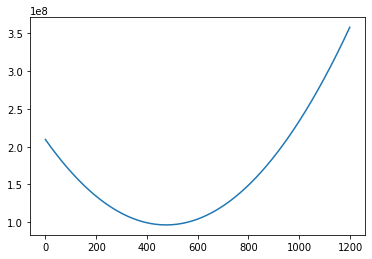

In [19]:
from matplotlib import pyplot

fuelCosts = []
for i in range(1200):
    fuelCosts.append(fuelCost(data,i))

pyplot.plot(fuelCosts)

In [87]:
# Puzzle 8!

def sfind(a,b):
    if len(b) > len(a):
        return -1
    for i in range(len(b)):
        if a.find(b[i]) == -1:
            return -1
    return 1

def shfind(a,b):
    if len(b) != len(a):
        return -1
    for i in range(len(b)):
        if a.find(b[i]) == -1:
            return -1
    return 1

def menha(a,b):
    men = ''
    for i in range(len(a)):
        if b.find(a[i]) == -1:
            men += a[i]
    return men

f = open('data/puzzle8.txt', 'r')
data = [s.split(' | ') for s in f.read().split('\n')]

tedad = 0
sum = 0

for i in range(len(data)):
    yek = ''
    haft = ''
    char = ''
    hasht = ''

    sefr = ''
    do = ''
    se = ''
    panj = ''
    shish = ''
    noh = ''

    data[i][0] = data[i][0].split(' ')
    data[i][1] = data[i][1].split(' ')

    # part 1:
    for n in range(4):
        if len(data[i][1][n]) == 2 or len(data[i][1][n]) == 3 or len(data[i][1][n]) == 4 or len(data[i][1][n]) == 7:
            tedad += 1
    
    # part 2:
    for n in range(10):
        if len(data[i][0][n]) == 2:
            yek = data[i][0][n]
            break
    for n in range(10):
        if len(data[i][0][n]) == 3:
            haft = data[i][0][n]
            break
    for n in range(10):
        if len(data[i][0][n]) == 4:
            char = data[i][0][n]
            break
    for n in range(10):
        if len(data[i][0][n]) == 7:
            hasht = data[i][0][n]
            break
    for n in range(10):
        if data[i][0][n] == yek or data[i][0][n] == haft or data[i][0][n] == char or data[i][0][n] == hasht:
            continue
        else:
            if len(data[i][0][n]) == 5:
                if sfind(data[i][0][n], yek) == 1:
                    se = data[i][0][n]
                else:
                    if sfind(data[i][0][n], menha(char, yek)) == 1:
                        panj = data[i][0][n]
                    else:
                        do = data[i][0][n]
            else:
                if sfind(data[i][0][n], yek) != 1:
                    shish = data[i][0][n]
                else:
                    if sfind(data[i][0][n], menha(char, yek)) == 1:
                        noh = data[i][0][n]
                    else:
                        sefr = data[i][0][n]
    for n in range(4):
        if shfind(data[i][1][n], yek) == 1:
            sum += 1 * (10**(3-n))
            data[i][1][n] = 1
        elif shfind(data[i][1][n], do) == 1:
            sum += 2 * (10**(3-n))
            data[i][1][n] = 2
        elif shfind(data[i][1][n], se) == 1:
            sum += 3 * (10**(3-n))
            data[i][1][n] = 3
        elif shfind(data[i][1][n], char) == 1:
            sum += 4 * (10**(3-n))
            data[i][1][n] = 4
        elif shfind(data[i][1][n], panj) == 1:
            sum += 5 * (10**(3-n))
            data[i][1][n] = 5
        elif shfind(data[i][1][n], shish) == 1:
            sum += 6 * (10**(3-n))
            data[i][1][n] = 6
        elif shfind(data[i][1][n], haft) == 1:
            sum += 7 * (10**(3-n))
            data[i][1][n] = 7
        elif shfind(data[i][1][n], hasht) == 1:
            sum += 8 * (10**(3-n))
            data[i][1][n] = 8
        elif shfind(data[i][1][n], noh) == 1:
            sum += 9 * (10**(3-n))
            data[i][1][n] = 9
        else:
            data[i][1][n] = 0

print(tedad)
print(sum)

504
1073431
